In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import bar_chart_race as bcr
import matplotlib.pyplot as plt
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter
import folium
import plotly.graph_objs as go
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, BasicTickFormatter
from bokeh.palettes import Spectral4
from folium.plugins import HeatMap

In [21]:
df = pd.concat(map(lambda file: pd.read_csv(file, on_bad_lines='skip', low_memory=False), ['Chicago_Crimes_2001_to_2004.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2012_to_2017.csv', 'Chicago_Crimes_2017_to_2020.csv', 'Chicago_Crimes_2021_to_2023.csv']))

In [3]:
df.sort_values(by='Date', ascending=False, inplace=True)

In [22]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,"(41.691784636, -87.635115968)"


In [23]:
df.drop(['Unnamed: 0', 'ID', 'IUCR', 'FBI Code', 'Block', 'Ward', 'X Coordinate', 'Y Coordinate', 'Year', 'Domestic', 'District', 'Community Area', 'Updated On', 'Location'],inplace=True, axis=1)

In [24]:
df.shape

(9461681, 9)

In [25]:
df.dropna(inplace=True)

In [39]:
df.shape

(8634932, 14)

In [26]:
df.drop_duplicates(subset=['Case Number'], inplace=True)

In [27]:
df.shape

(7574150, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7574150 entries, 1 to 509778
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Beat                  int64  
 7   Latitude              object 
 8   Longitude             float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 527.3+ MB


In [10]:
df_cat = df.select_dtypes(include='object').copy()
df_cat.head()

,Case Number,Date,Primary Type,Description,Location Description,Updated On,Latitude,Location
1,HM278933,03/01/2003 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,04/15/2016 08:55:02 AM,41.817229,"(41.817229156, -87.637328162)"
4,HM275615,05/01/2003 01:00:00 AM,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,04/15/2016 08:55:02 AM,41.691785,"(41.691784636, -87.635115968)"
6,HM403711,01/01/2001 11:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,08/29/2006 03:46:28 AM,41.68702,"(41.687020002, -87.60844523)"
7,HM216293,03/15/2003 12:00:00 AM,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,04/15/2016 08:55:02 AM,41.729712,"(41.729712374, -87.653158513)"
9,HM282389,01/01/2003 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,04/15/2016 08:55:02 AM,41.869772,"(41.869772159, -87.708180162)"


In [29]:
print(df['Primary Type'].unique(),len(df['Primary Type'].unique()))

['OTHER OFFENSE' 'THEFT' 'CRIM SEXUAL ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'MOTOR VEHICLE THEFT' 'SEX OFFENSE'
 'DECEPTIVE PRACTICE' 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'HOMICIDE'
 'ROBBERY' 'BATTERY' 'ARSON' 'BURGLARY' 'ASSAULT' 'WEAPONS VIOLATION'
 'PUBLIC PEACE VIOLATION' 'INTERFERENCE WITH PUBLIC OFFICER' 'KIDNAPPING'
 'NARCOTICS' 'GAMBLING' 'INTIMIDATION' 'STALKING' 'RITUALISM'
 'LIQUOR LAW VIOLATION' 'PROSTITUTION' 'DOMESTIC VIOLENCE' 'OBSCENITY'
 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY' 'NON-CRIMINAL'
 'HUMAN TRAFFICKING' 'CONCEALED CARRY LICENSE VIOLATION' 'NON - CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'CRIMINAL SEXUAL ASSAULT'] 36


In [30]:
df['Primary Type'] = df['Primary Type'].str.replace('NON - CRIMINAL','NON-CRIMINAL')

In [31]:
df['Primary Type'] = df['Primary Type'].str.replace(r"\(.*\)","")

C:\Users\Brian.DaSilva\AppData\Local\Temp\ipykernel_34148\3992758225.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Primary Type'] = df['Primary Type'].str.replace(r"\(.*\)","")


In [32]:
df['Primary Type'] = df['Primary Type'].str.replace('NON-CRIMINAL ','NON-CRIMINAL')

In [33]:
df['Primary Type'] = df['Primary Type'].str.replace('MOTOR VEHICLE THEFT','THEFT')

In [34]:
df['Primary Type'] = df['Primary Type'].str.replace('CRIM SEXUAL ASSAULT','CRIMINAL SEXUAL ASSAULT')

In [35]:
print(df['Primary Type'].unique(),len(df['Primary Type'].unique()))

['OTHER OFFENSE' 'THEFT' 'CRIMINAL SEXUAL ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'SEX OFFENSE' 'DECEPTIVE PRACTICE'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'HOMICIDE' 'ROBBERY' 'BATTERY'
 'ARSON' 'BURGLARY' 'ASSAULT' 'WEAPONS VIOLATION' 'PUBLIC PEACE VIOLATION'
 'INTERFERENCE WITH PUBLIC OFFICER' 'KIDNAPPING' 'NARCOTICS' 'GAMBLING'
 'INTIMIDATION' 'STALKING' 'RITUALISM' 'LIQUOR LAW VIOLATION'
 'PROSTITUTION' 'DOMESTIC VIOLENCE' 'OBSCENITY' 'OTHER NARCOTIC VIOLATION'
 'PUBLIC INDECENCY' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'CONCEALED CARRY LICENSE VIOLATION'] 32


In [36]:
df['rank'] = df.groupby('Primary Type')['Primary Type'].transform('count').rank(method="dense", ascending=False)

In [37]:
df.head(5)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Beat,Latitude,Longitude,rank
1,HM278933,03/01/2003 12:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,935,41.817229156,-87.637328,6.0
4,HM275615,05/01/2003 01:00:00 AM,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,2233,41.691784636,-87.635116,1.0
6,HM403711,01/01/2001 11:00:00 AM,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,531,41.687020002,-87.608445,15.0
7,HM216293,03/15/2003 12:00:00 AM,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,2222,41.729712374,-87.653159,6.0
9,HM282389,01/01/2003 12:00:00 AM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,1134,41.869772159,-87.708180,1.0


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_counts = df.groupby('Year').size().reset_index(name='Count')

In [40]:
df.head()

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Beat,Latitude,Longitude,rank,Year
1,HM278933,2003-03-01 00:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,935,41.817229156,-87.637328,6.0,2003
4,HM275615,2003-05-01 01:00:00,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,2233,41.691784636,-87.635116,1.0,2003
6,HM403711,2001-01-01 11:00:00,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,531,41.687020002,-87.608445,15.0,2001
7,HM216293,2003-03-15 00:00:00,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,2222,41.729712374,-87.653159,6.0,2003
9,HM282389,2003-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,1134,41.869772159,-87.708180,1.0,2003


In [85]:
crime_counts = df['Year'].value_counts().reset_index().rename(columns={'index': 'Year', 'Year': 'Count'})

crime_counts = crime_counts.sort_values('Year')
source = ColumnDataSource(crime_counts)

p = figure(title="Count of Crimes Over the Years", x_axis_label='Year', y_axis_label='Count', x_range=(crime_counts['Year'].min(), crime_counts['Year'].max()), width=800, height=400)
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.line(x='Year', y='Count', source=source, line_width=2, color=Spectral4[0], legend_label="Crime Count")

output_notebook()
show(p)

Loading BokehJS ...

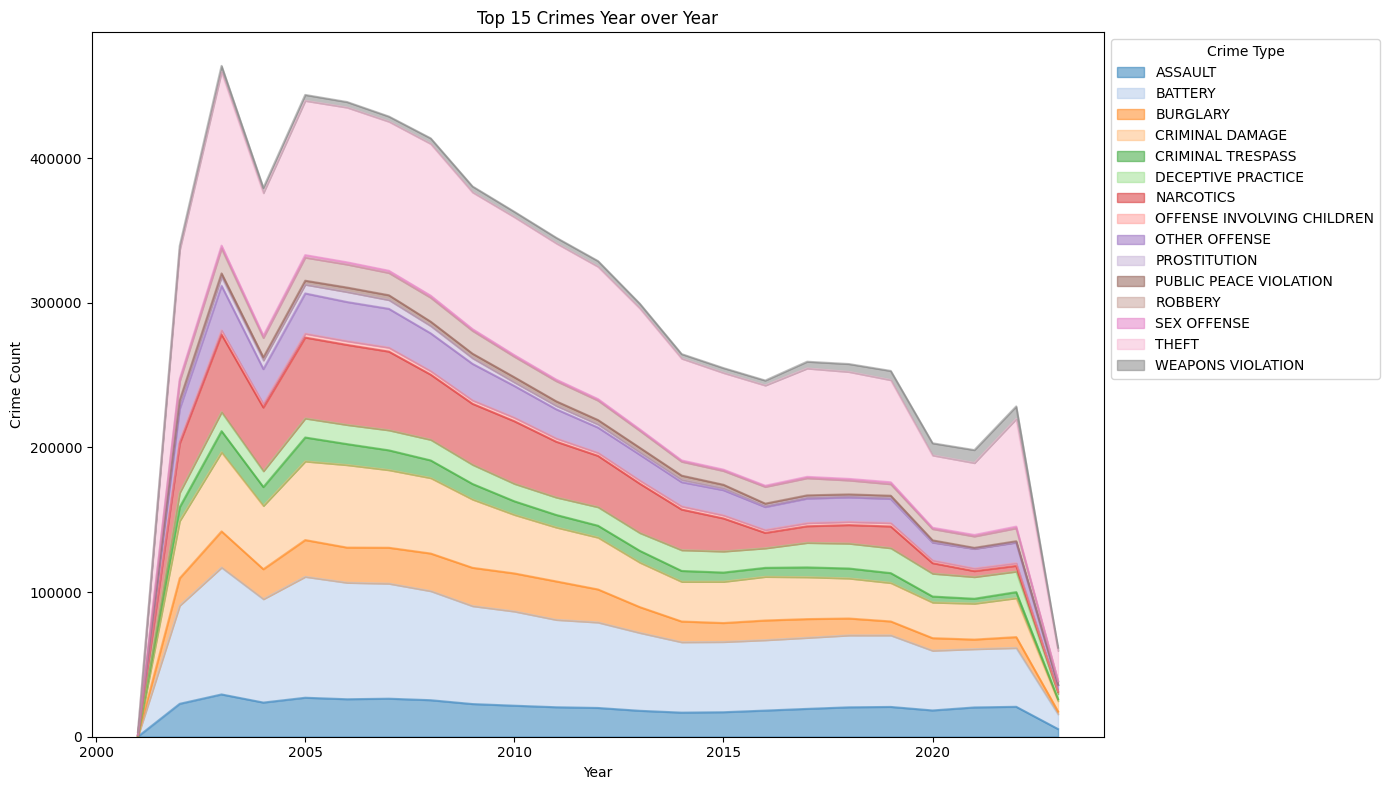

In [62]:
top_15_crimes = df[df['rank'] <= 15]
yearly_counts = top_15_crimes.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

yearly_counts_pivot = yearly_counts.pivot_table(index='Year', columns='Primary Type', values='Count', fill_value=0)

plt.figure(figsize=(14, 8))
sns.set_palette("tab20")
yearly_counts_pivot.plot.area(ax=plt.gca(), alpha=0.5)
plt.title('Top 15 Crimes Year over Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

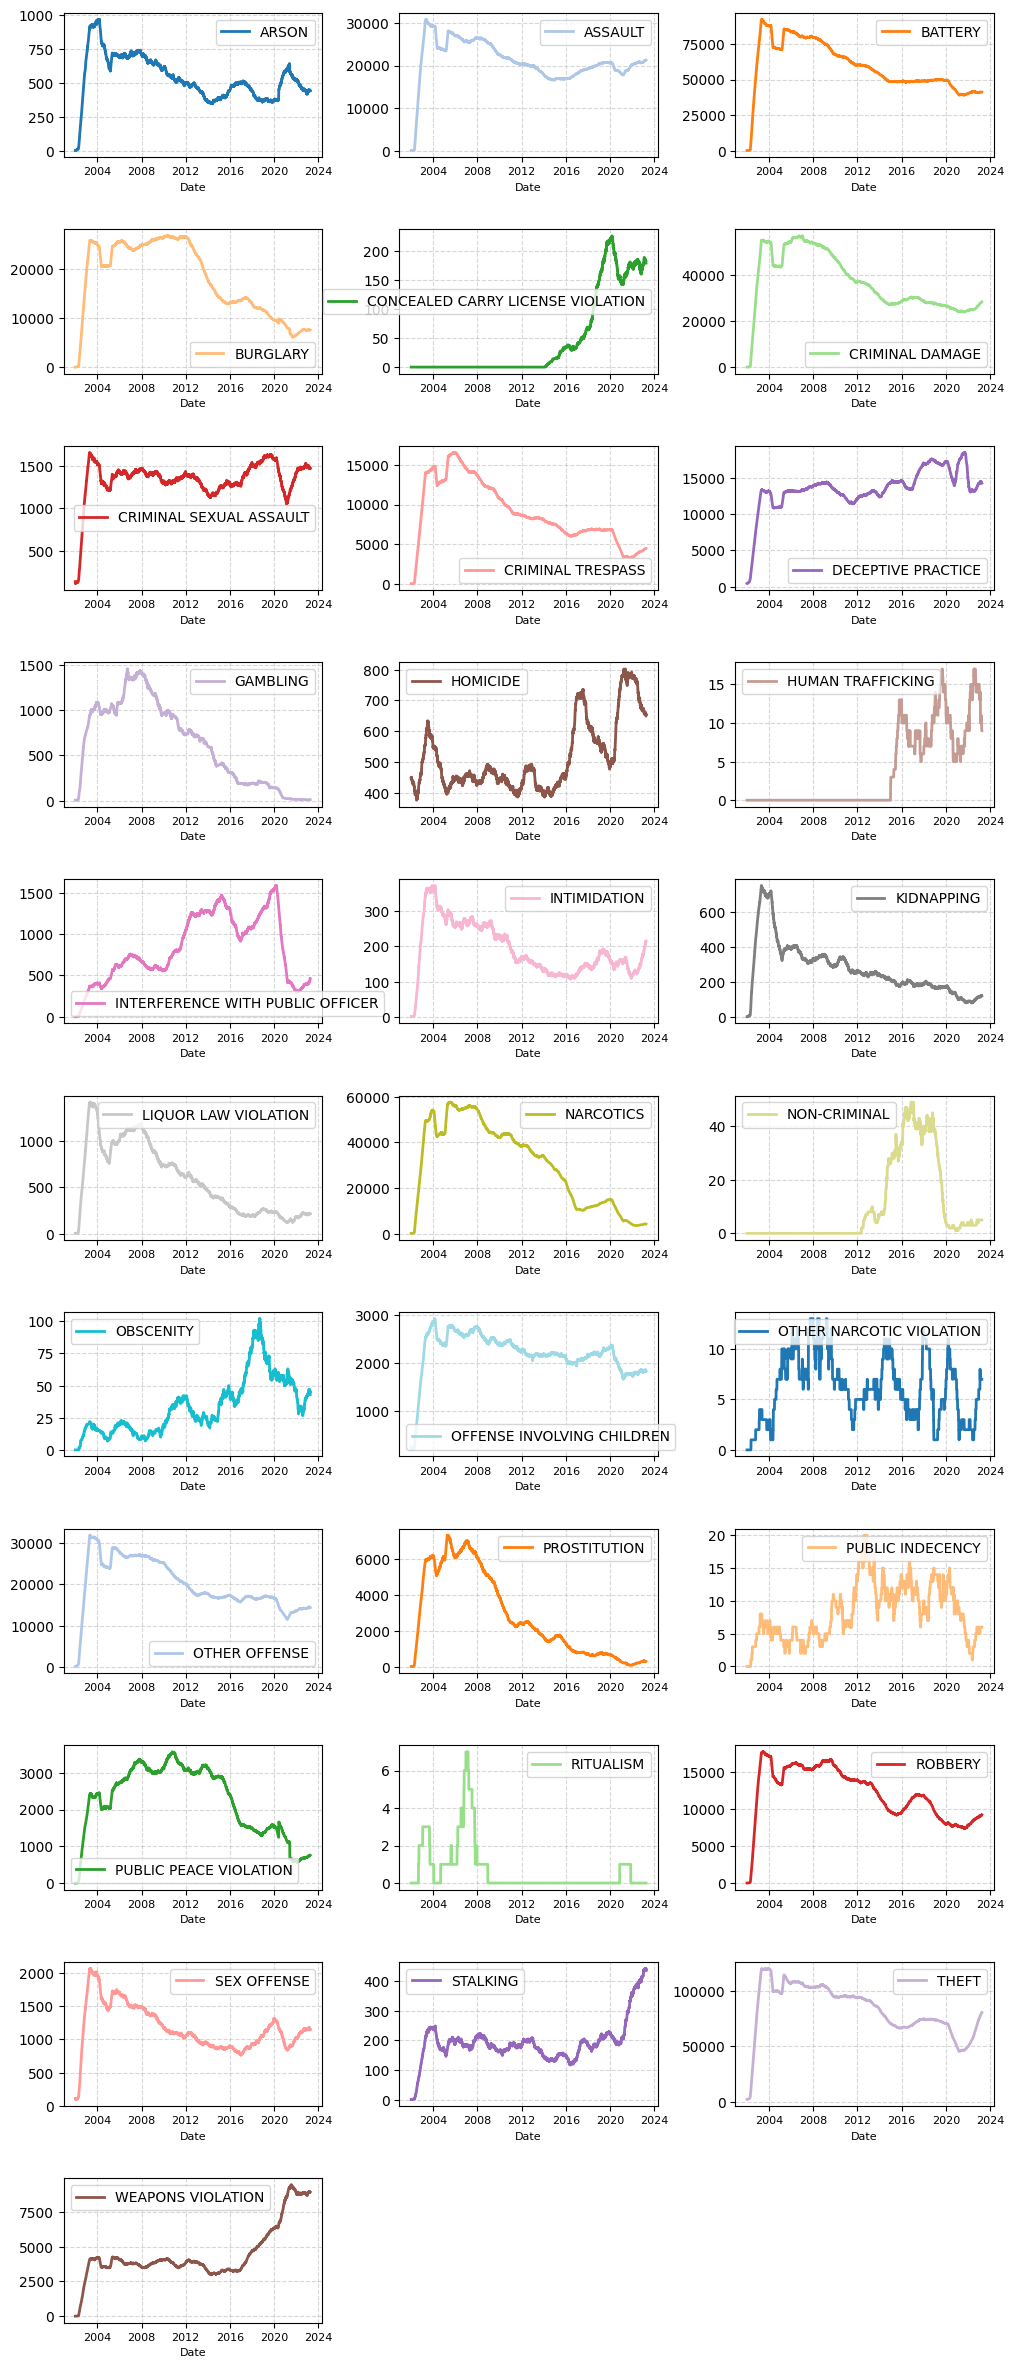

In [87]:
sns.set_palette('husl', n_colors=len(df['Primary Type'].unique()))

crime_by_type = df.pivot_table('Case Number', aggfunc=np.size, columns='Primary Type', index=df['Date'].dt.date, fill_value=0)
crime_by_type.index = pd.DatetimeIndex(crime_by_type.index)
plot = crime_by_type.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False, linewidth=2)

for ax in plot.flatten():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    for label in ax.get_xticklabels():
        label.set_fontsize(8)
    
    ax.set_title(ax.get_title(), fontsize=10, fontweight='bold', pad=12)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

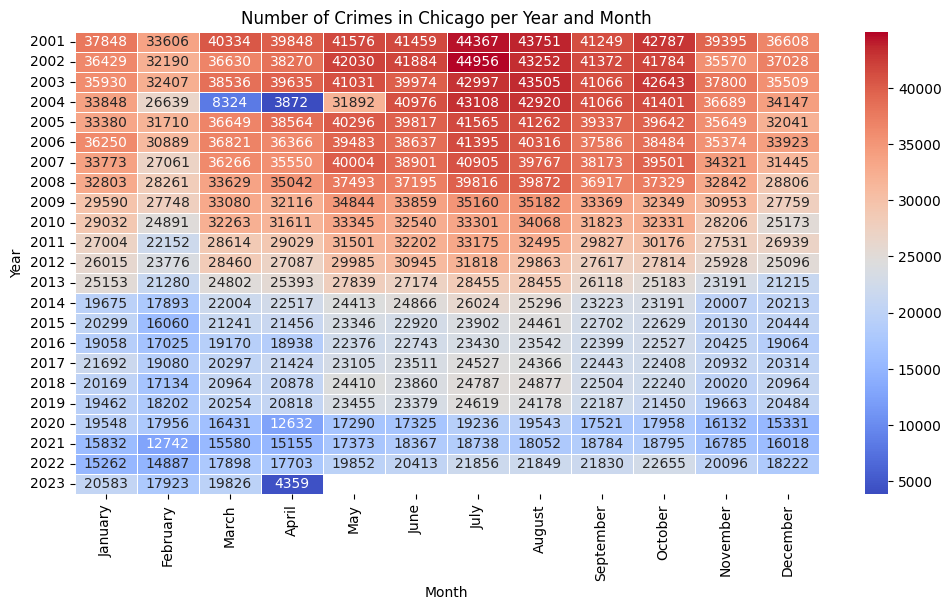

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')

year_month_data = df.groupby(['Year', 'Month']).size().reset_index(name='IncidentCount')
year_month_data = year_month_data.pivot(index='Year', columns='Month', values='IncidentCount')

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_month_data = year_month_data[month_order]

plt.figure(figsize=(12, 6))
sns.heatmap(year_month_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)
plt.title('Number of Crimes in Chicago per Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [63]:
filtered_df = df[df['rank'] < 15]

grouped_data = filtered_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
pivoted_data = grouped_data.pivot_table(values='Count', index='Year', columns='Primary Type', fill_value=0)

bcr.bar_chart_race(df=pivoted_data, title='Top 15 Crime Types in Chicago Year Over Year')

C:\Users\Brian.DaSilva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\Brian.DaSilva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [65]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek

def get_time_block(hour):
    if 6 <= hour < 12:
        return 'Morning (6AM-12PM)'
    elif 12 <= hour < 18:
        return 'Afternoon (1-6PM)'
    elif 18 <= hour < 24:
        return 'Evening (7-12AM)'
    else:
        return 'Night (1-5AM)'

df['TimeBlock'] = df['Hour'].apply(get_time_block)
timeblock_counts = df.pivot_table(index='TimeBlock', columns='DayOfWeek', aggfunc='count', fill_value=0)['Case Number']
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

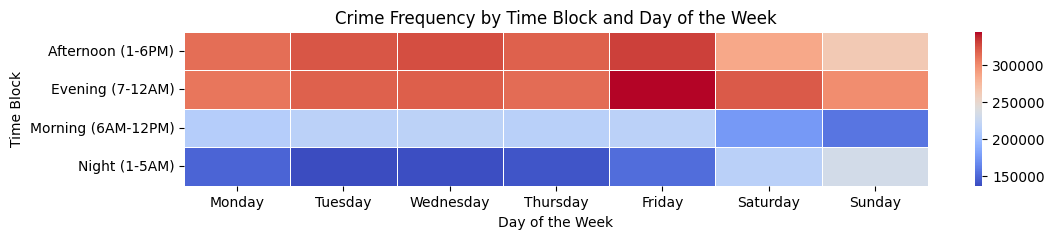

In [66]:
plt.figure(figsize=(12, 2))
sns.heatmap(timeblock_counts, cmap='coolwarm', linewidths=0.5, xticklabels=day_labels)
plt.title('Crime Frequency by Time Block and Day of the Week')
plt.ylabel('Time Block')
plt.xlabel('Day of the Week')
plt.show()

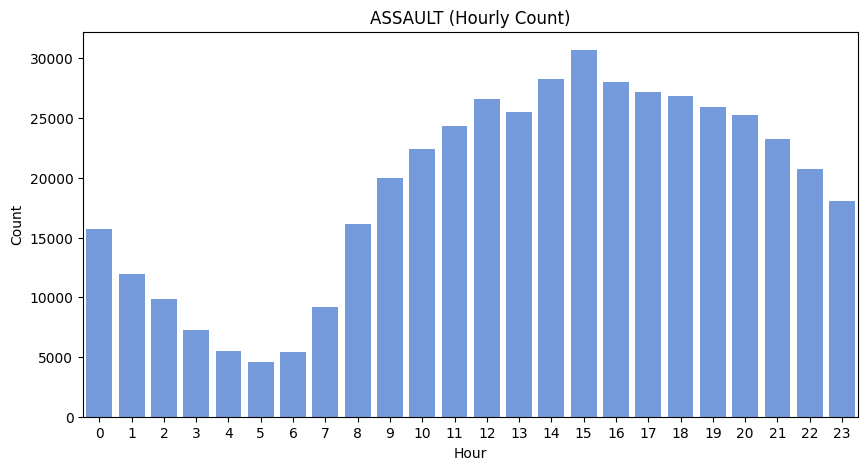

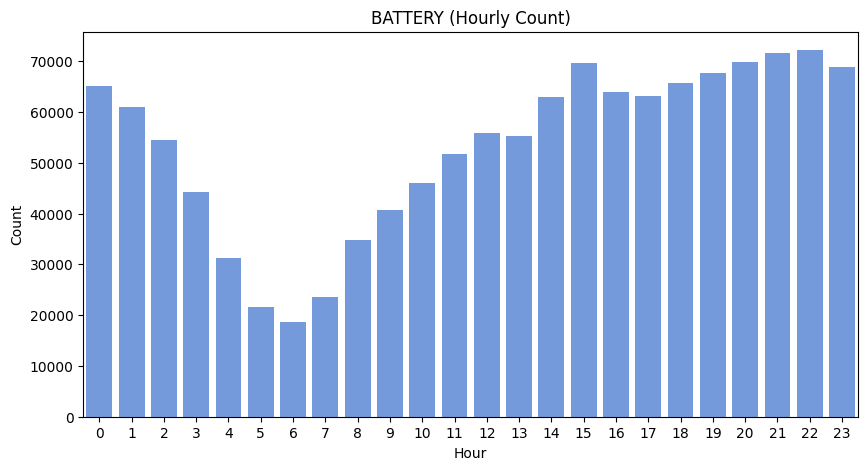

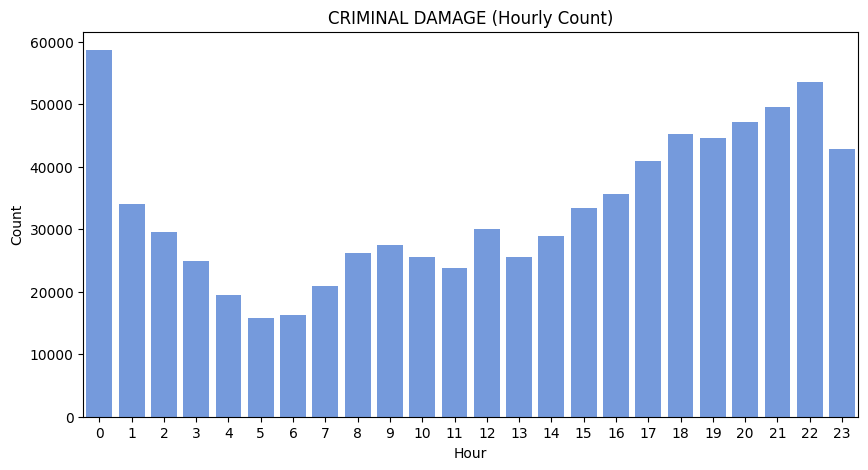

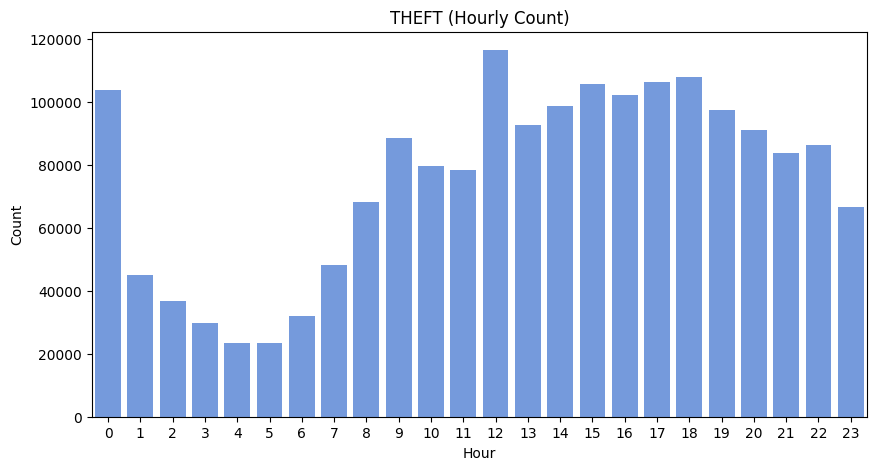

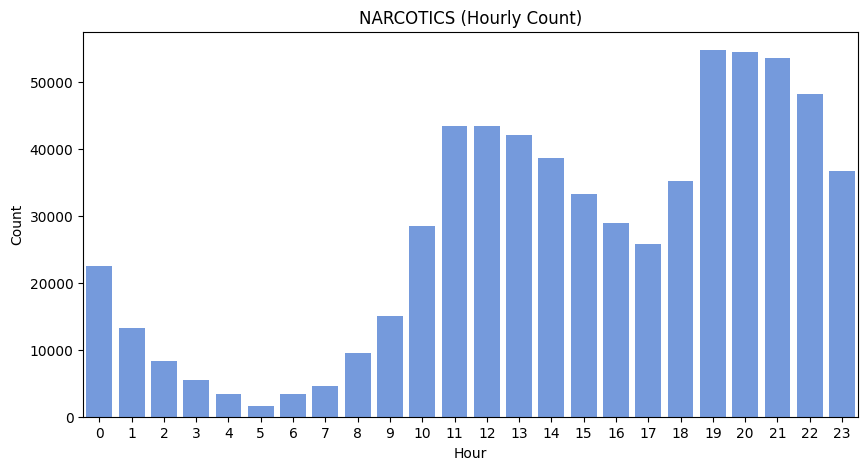

In [72]:
top_5_primary_types = df[df["rank"] <= 5]["Primary Type"].unique()
df_top_5 = df[df["Primary Type"].isin(top_5_primary_types)]

hourly_count = df_top_5.groupby(["Primary Type", "Hour"]).size().reset_index(name="Count")

for primary_type in top_5_primary_types:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=hourly_count[hourly_count["Primary Type"] == primary_type], x="Hour", y="Count", color="cornflowerblue")
    plt.title(f"{primary_type} (Hourly Count)")
    plt.xlabel("Hour")
    plt.ylabel("Count")
    plt.show()


In [92]:
aux = df.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4) * 100
aux.sort_values('Arrest', inplace=True)

trace = go.Bar(
    x=aux['Arrest (%)'],
    y=aux['Primary Type'],
    orientation='h',
    text=aux['Arrest (%)'].round(1).astype(str) + '%',
    textposition='outside',
    marker=dict(
        color=aux['Arrest (%)'],
        colorscale='Blugrn',
        line=dict(color='rgb(8,48,107)', width=1.5)
    ),
    opacity=0.8
)

layout = go.Layout(
    title='Arrested Rate in % per Type Crime in Chicago',
    xaxis=dict(title='Arrest Rate (%)', tickformat=".1f"),
    yaxis=dict(title='Primary Type'),
    margin=dict(l=200, r=50, t=100, b=50),
    plot_bgcolor='rgb(255, 255, 255)', 
    paper_bgcolor='rgb(255, 255, 255)',
    width=1200, 
    height=800  
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

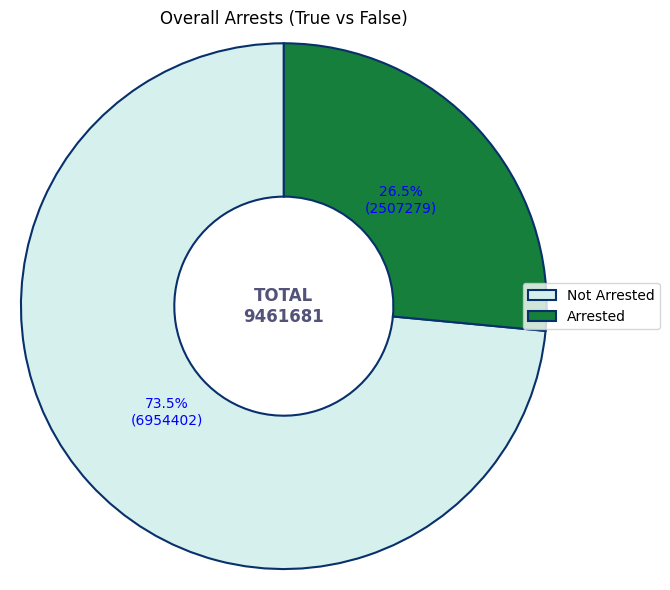

In [14]:
def label(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

arrest_counts = df['Arrest'].value_counts()

sizes = [arrest_counts[False], arrest_counts[True]]

colors = plt.get_cmap('BuGn')(np.linspace(0.2, 0.8, 2))

fig, ax = plt.subplots(figsize=(7, 6))
wedges, texts, autotexts = ax.pie(sizes,
                                   autopct=lambda pct: label(pct, sizes),
                                   radius=1.2,
                                   colors=colors,
                                   startangle=90,
                                   textprops=dict(color="blue"),
                                   wedgeprops=dict(width=0.7, edgecolor=(8/255, 48/255, 107/255), linewidth=1.5))

ax.legend(wedges, ['Not Arrested', 'Arrested'],
          loc='center right',
          bbox_to_anchor=(0.7, 0, 0.5, 1))

ax.text(0, 0, 'TOTAL\n{}'.format(df['Arrest'].count()),
        weight='bold', size=12, color='#52527a',
        ha='center', va='center')

ax.set_title("Overall Arrests (True vs False)", color="black")
plt.tight_layout()
plt.show()


In [70]:
grouped_data = df.groupby(["Year", "Arrest"]).size().reset_index(name="Count")
pivot_data = grouped_data.pivot_table(index="Year", columns="Arrest", values="Count", fill_value=0)

pivot_data['Total'] = pivot_data[False] + pivot_data[True]


pivot_data['Not Arrested (%)'] = (pivot_data[False] / pivot_data['Total']) * 100
pivot_data['Arrested (%)'] = (pivot_data[True] / pivot_data['Total']) * 100


percentage_data = pivot_data[['Not Arrested (%)', 'Arrested (%)']]

trace_not_arrested = go.Bar(
    x=percentage_data.index,
    y=percentage_data['Not Arrested (%)'],
    name='Not Arrested',
    text=percentage_data['Not Arrested (%)'].round(1).astype(str) + '%',
    textposition='auto',
    marker=dict(
        color='rgb(75,192,192)',
        line=dict(color='rgb(8,48,107)', width=1.5)
    )
)

trace_arrested = go.Bar(
    x=percentage_data.index,
    y=percentage_data['Arrested (%)'],
    name='Arrested',
    text=percentage_data['Arrested (%)'].round(1).astype(str) + '%',
    textposition='auto',
    marker=dict(
        color='rgb(52,152,219)',
        line=dict(color='rgb(8,48,107)', width=1.5)
    )
)

data = [trace_not_arrested, trace_arrested]

layout = go.Layout(
    title="Yearly Comparison of Arrested vs Not Arrested",
    barmode='stack',
    xaxis=dict(title="Year"),
    yaxis=dict(title="Percentage"),
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    width=1200, 
    height=800  
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [58]:
geodata = df.sort_values(by='Date', ascending=False).head(10000)

In [59]:
from geopy.geocoders import ArcGIS
geolocator = ArcGIS(user_agent="geoapiExercises")

def extract_neighborhood(lat, lng):
    if lat is None or lng is None:
        return None
    location = geolocator.reverse((lat, lng))
    try:
        neighborhood = location.raw['Neighborhood']
    except KeyError:
        neighborhood = None
    return neighborhood

geodata['Neighborhood'] = geodata.apply(lambda row: extract_neighborhood(row['Latitude'], row['Longitude']), axis=1)

neighborhood_group = geodata.groupby('Neighborhood').size().reset_index(name='IncidentCount')
neighborhood_lat_lng = geodata.groupby('Neighborhood').agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
neighborhood_data = neighborhood_group.merge(neighborhood_lat_lng, on='Neighborhood')

In [105]:
neighborhood_data.sort_values(by='IncidentCount', ascending=False)[1:21]

,Neighborhood,IncidentCount,Latitude,Longitude
7,Austin,439,41.889781,-87.756939
83,South Shore,353,41.762842,-87.572452
52,Lawndale,288,41.860481,-87.716659
6,Auburn Gresham,270,41.746204,-87.655637
42,Greater Grand Crossing,270,41.764456,-87.618596
78,Roseland,267,41.704334,-87.623841
65,Near West Side,264,41.872776,-87.667139
45,Humboldt Park,229,41.901386,-87.719730
22,Chatham,228,41.743320,-87.613006
57,Loop,217,41.882938,-87.627781


In [68]:
chicago_map = folium.Map(location=[41.881832, -87.623177], zoom_start=11)

data = neighborhood_data[['Latitude', 'Longitude', 'IncidentCount']]
data = data.dropna()

HeatMap(data, radius=15, blur=25).add_to(chicago_map)

chicago_map

In [71]:
df["Hour"] = df["Date"].dt.hour

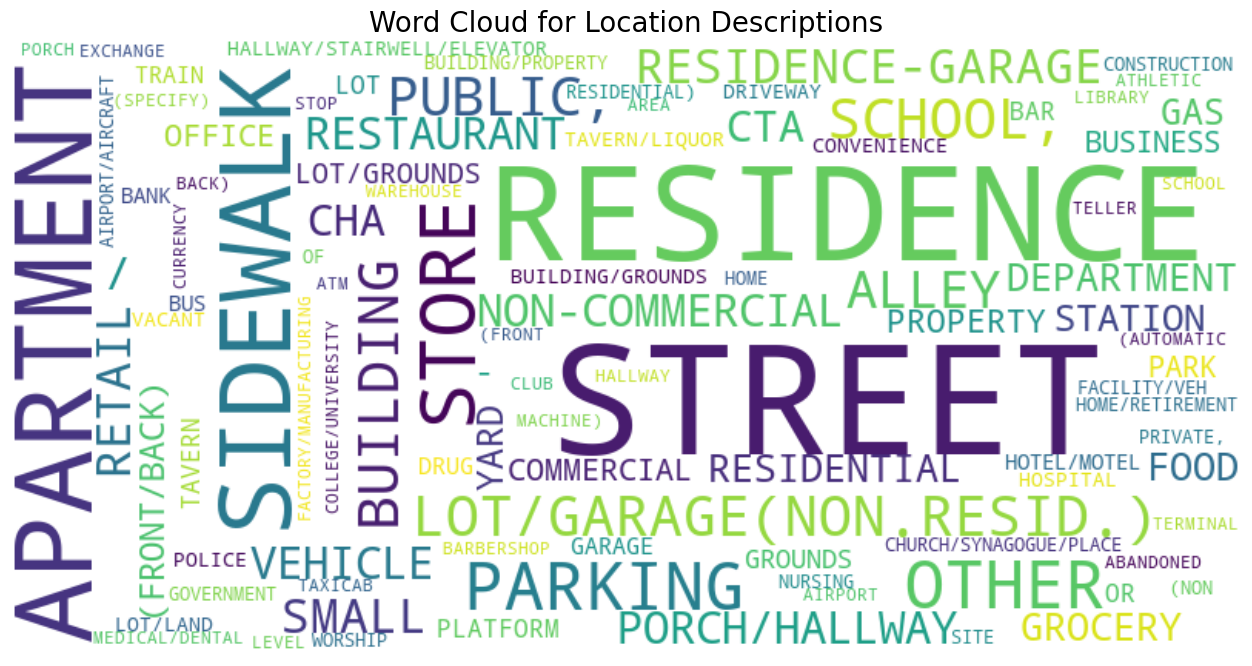

In [20]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

location_descriptions = df['Location Description'].dropna().values
words = ' '.join(location_descriptions).split(' ')
word_freq = Counter(words)

wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=100, max_font_size=100, min_font_size=10, colormap='viridis').generate_from_frequencies(word_freq)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Location Descriptions', fontsize=20)
plt.show()


In [243]:
beat_counts = df.groupby("Beat").size().reset_index(name="Incident Count")
beat_counts_sorted = beat_counts.sort_values(by="Incident Count", ascending=False)

print(beat_counts_sorted.head(20))

     Beat  Incident Count
45    423           50909
43    421           50654
68    624           46462
189  1533           45153
52    511           45120
227  1834           44532
131  1112           44061
95    823           43722
184  1522           41514
42    414           41449
300  2533           40473
65    621           40254
62    612           39721
31    321           38407
97    825           38020
75    713           37169
118  1011           37136
55    522           37107
69    631           37097
53    512           36906


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7574150 entries, 1 to 509778
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Case Number           object        
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Beat                  int64         
 7   Latitude              object        
 8   Longitude             float64       
 9   rank                  float64       
 10  Year                  int64         
 11  Month                 object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 700.7+ MB
